In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
#sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
sys.path.append ('/Projects/PyPharmer_devel/') #path for angle in Groningen

import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import PyPharmer as phr
import simplejson as json
from pprint import pprint
import os

# Matplotlib options
%matplotlib inline
#mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 12

In [3]:
json_file1='../Server_Files/ZINCpharmer.json'
json_file2='../Server_Files/pharmit.json'
json_file3='../Server_Files/gold_soln_l2199_3D_H_Ch_m1_4.json'
benchmark='../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json'

In [4]:
ph3=json.loads(open(json_file3).read())
ph2=json.loads(open(json_file2).read())
ph1=json.loads(open(json_file1).read())
bench=json.loads(open(benchmark).read())

In [5]:
tmp_json_keys = bench.keys ()
tmp_json = bench

In [6]:
tmp_json.get ('points')

[{'name': 'Aromatic',
  'hasvec': True,
  'x': 11.636,
  'y': 60.16,
  'z': 12.085,
  'radius': 1.1,
  'enabled': True,
  'vector_on': 0,
  'svector': {'x': 0.46188009673696656,
   'y': 0.2886147167078458,
   'z': -0.8386705679454242},
  'minsize': '',
  'maxsize': '',
  'selected': False},
 {'name': 'HydrogenDonor',
  'hasvec': True,
  'x': 14.657,
  'y': 55.013,
  'z': 12.152,
  'radius': 0.5,
  'enabled': True,
  'vector_on': 0,
  'svector': {'x': -0.2433733398206189,
   'y': -0.8487437005362286,
   'z': -0.46947156278589053},
  'minsize': '',
  'maxsize': '',
  'selected': False},
 {'name': 'HydrogenDonor',
  'hasvec': True,
  'x': 16.661,
  'y': 51.228,
  'z': 14.538,
  'radius': 0.5,
  'enabled': True,
  'vector_on': 0,
  'svector': {'x': 0.9810292026901866,
   'y': -0.19069275969204794,
   'z': 0.03489949670250108},
  'minsize': '',
  'maxsize': '',
  'selected': False},
 {'name': 'HydrogenAcceptor',
  'hasvec': True,
  'x': 10.615,
  'y': 59.639,
  'z': 11.334,
  'radius': 0.5,

## Extracting descriptors and vectors

In [7]:
descriptors_list={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

if 'points' in tmp_json_keys:
    
                descriptors=[]
        
                for json_object in tmp_json.get ('points'):
                    
                
                    if json_object.get ('enabled')==True:
                        name=descriptors_list[json_object.get ('name')]
                        vector=json_object.get ('vector')
                        vector_on=json_object.get ('vector_on')
                        
                        if 'vector' and 'vector_on' in json_object.keys ():
                            if vector_on ==1:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                        element['x'], element['y'],element['z']])
                                
                            if vector_on ==0:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                            
                            descriptors.append (descriptor)
                           
                        if 'vector' and not 'vector_on' in json_object.keys ():
                            
                            if vector!=None:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                element['x'], element['y'],element['z']])
                            
                                
                            if vector==None:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                                
                            descriptors.append (descriptor)
                                
                points=np.array (descriptors)
                pprint (points)

array([[ 4.   , 11.636, 60.16 , 12.085,  0.   ,  0.   ,  0.   ],
       [ 3.   , 14.657, 55.013, 12.152,  0.   ,  0.   ,  0.   ],
       [ 3.   , 16.661, 51.228, 14.538,  0.   ,  0.   ,  0.   ],
       [ 2.   , 10.615, 59.639, 11.334,  0.   ,  0.   ,  0.   ],
       [ 2.   , 14.823, 51.786, 15.735,  0.   ,  0.   ,  0.   ],
       [ 1.   , 11.636, 60.16 , 12.085,  0.   ,  0.   ,  0.   ],
       [ 1.   , 16.702, 53.106, 12.417,  0.   ,  0.   ,  0.   ],
       [ 1.   , 16.107, 48.795, 17.282,  0.   ,  0.   ,  0.   ],
       [ 1.   , 16.912, 54.912, 10.105,  0.   ,  0.   ,  0.   ]])


## Extracting descriptors and svectors 
(mistake; we need vectors)

descriptors={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

descriptors=[]
for point in ph2.get ('points'):
    if point.get ('enabled')==False:
        if 'svector' in point.keys ():
            svector=point.get ('svector')
            if svector!=None:
                name=descriptors[point.get('name')]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'), 
                    svector.get('x'),svector.get('y'),svector.get('z')])
            if svector== None:
                svector=[0]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'),
                    svector[0],svector[0],svector[0]])

## Testing the library with multiple files

In [8]:
BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
pprint (ligands)

['../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json']


In [9]:
Hydrophobic         = [[],[],[]]
HydrogenAcceptor    = [[],[],[]]
HydrogenDonor       = [[],[],[]]
Aromatic            = [[],[],[]]
NegativeIon         = [[],[],[]]
PositiveIon         = [[],[],[]]
InclusionSphere     = [[],[],[]]
Other               = [[],[],[]]
PhenylalanineAnalog = [[],[],[]]
LeuValAnalog        = [[],[],[]]
    
for i in ligands:
    data=phr.Descriptors (input_file=i,select='all')
    
    for element in data.points:
        if element[0]==1.0:
            Hydrophobic[0].append (element[1])
            Hydrophobic[1].append (element[2])
            Hydrophobic[2].append (element[3])
        if element[0]==2.0:
            HydrogenAcceptor[0].append (element[1])
            HydrogenAcceptor[1].append (element[2])
            HydrogenAcceptor[2].append (element[3])
        if element[0]==3.0:
            HydrogenDonor[0].append (element[1])
            HydrogenDonor[1].append (element[2])
            HydrogenDonor[2].append (element[3])
        if element[0]==4.0:
            Aromatic[0].append (element[1])
            Aromatic[1].append (element[2])
            Aromatic[2].append (element[3])
        if element[0]==4.0:
            NegativeIon[0].append (element[1])
            NegativeIon[1].append (element[2])
            NegativeIon[2].append (element[3])
        if element[0]==5.0:
            PositiveIon[0].append (element[1])
            PositiveIon[1].append (element[2])
            PositiveIon[2].append (element[3])
        if element[0]==6.0:
            Other[0].append (element[1])
            Other[1].append (element[2])
            Other[2].append (element[3])
        if element[0]==7.0:
            PhenylalanineAnalog[0].append (element[1])
            PhenylalanineAnalog[1].append (element[2])
            PhenylalanineAnalog[2].append (element[3])
        if element[0]==8.0:
            LeuValAnalog[0].append (element[1])
            LeuValAnalog[1].append (element[2])
            LeuValAnalog[2].append (element[3])

<IPython.core.display.Javascript object>


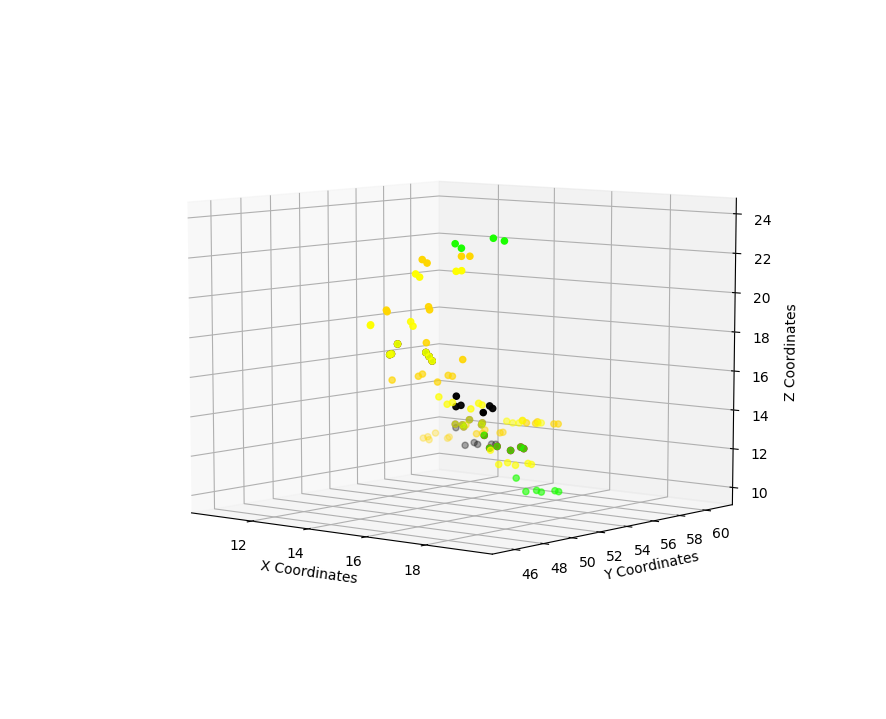

In [10]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(Hydrophobic[0],Hydrophobic[1],Hydrophobic[2], color=[0.100, 1.000, 0.000])
ax.scatter(HydrogenAcceptor[0],HydrogenAcceptor[1],HydrogenAcceptor[2], color=[1.000, 0.84, 0.000])
ax.scatter(HydrogenDonor[0],HydrogenDonor[1],HydrogenDonor[2], color='black') #[1.000, 1.000, 1.000]
ax.scatter(Aromatic[0],Aromatic[1],Aromatic[2], color=[0.627, 0.1254, 0.941])
ax.scatter(NegativeIon[0],NegativeIon[1],NegativeIon[2], color=[1.00, 0.00, 0.00])
ax.scatter(PositiveIon[0],PositiveIon[1],PositiveIon[2], color=[0.00, 0.00, 1.00])
ax.scatter(Other[0],Other[1],Other[2], color=[0.74, 0.74, 0.74])
ax.scatter(PhenylalanineAnalog[0],PhenylalanineAnalog[1],PhenylalanineAnalog[2], color=[1.0, 1.0, 0.0])
ax.scatter(LeuValAnalog[0],LeuValAnalog[1],LeuValAnalog[2], color=[1.0, 1.0, 0.0])
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')
plt.show()